# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [132]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Statements

In [133]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [134]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [135]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [136]:
df_hh_income.head()
df_pct_poverty.head()
df_pct_completed_hs.head()
df_share_race_city.head()
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [137]:
#shapes of dataframes
print(f"shape of df_hh_income: {df_hh_income.shape}, shape of pct_poverty: {df_pct_completed_hs.shape}, shape of df_pct_completed: {df_pct_poverty.shape}"
      f"shape of df_share_race_city: {df_share_race_city.shape}, shape of fatalities: {df_fatalities.shape}")


shape of df_hh_income: (29322, 3), shape of pct_poverty: (29329, 3), shape of df_pct_completed: (29329, 3)shape of df_share_race_city: (29268, 7), shape of fatalities: (2535, 14)


In [138]:
#column names
print(f"Column names of df_hh_income: {df_hh_income.columns.tolist()}")
print(f"Column names of pct_poverty: {df_pct_poverty.columns.tolist()}")
print(f"Column names of pct_completed: {df_pct_completed_hs.columns.tolist()}")
print(f"Column names of share_race_city: {df_share_race_city.columns.tolist()}")
print(f"Column names of fatalities: {df_fatalities.columns.tolist()}")

Column names of df_hh_income: ['Geographic Area', 'City', 'Median Income']
Column names of pct_poverty: ['Geographic Area', 'City', 'poverty_rate']
Column names of pct_completed: ['Geographic Area', 'City', 'percent_completed_hs']
Column names of share_race_city: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
Column names of fatalities: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [139]:
#nan values or duplicates
df_hh_income.isna()
df_pct_poverty.isna()
df_pct_completed_hs.isna()
df_share_race_city.isna()
df_fatalities.isna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2531,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2532,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2533,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [140]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [141]:
df_hh_income.duplicated().any()

False

In [142]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [143]:
df_pct_poverty.duplicated().any()

False

In [144]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [145]:
df_pct_completed_hs.duplicated().any()

False

In [146]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [147]:
df_share_race_city.duplicated().any()

False

In [148]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [149]:
df_fatalities.duplicated().any()

False

In [150]:
#Exploring the dfs
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [151]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [152]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [153]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [154]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [155]:
df_hh_income["Median Income"].fillna(0, inplace=True)
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29322 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [156]:
# Since the missing columns only make up to around 11% of the data, I decided to just remove all NaN values (filling it will ruin data integrity)
df_fatalities.dropna(inplace=True)
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), int64

In [157]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].apply(lambda x:str(x).replace('-','0')).astype('float64')
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [158]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].apply(lambda x:str(x).replace('-','0')).astype('float64')
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [159]:
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_black'] = df_share_race_city['share_black'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_white'] = df_share_race_city['share_white'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [160]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-null 

C:\Users\arda\AppData\Local\Temp\ipykernel_9144\1980925814.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [161]:
pct_poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
pct_poverty_by_state.head()

Geographic Area
MS   26.88
AZ   25.27
GA   23.66
AR   22.96
NM   22.51
Name: poverty_rate, dtype: float64

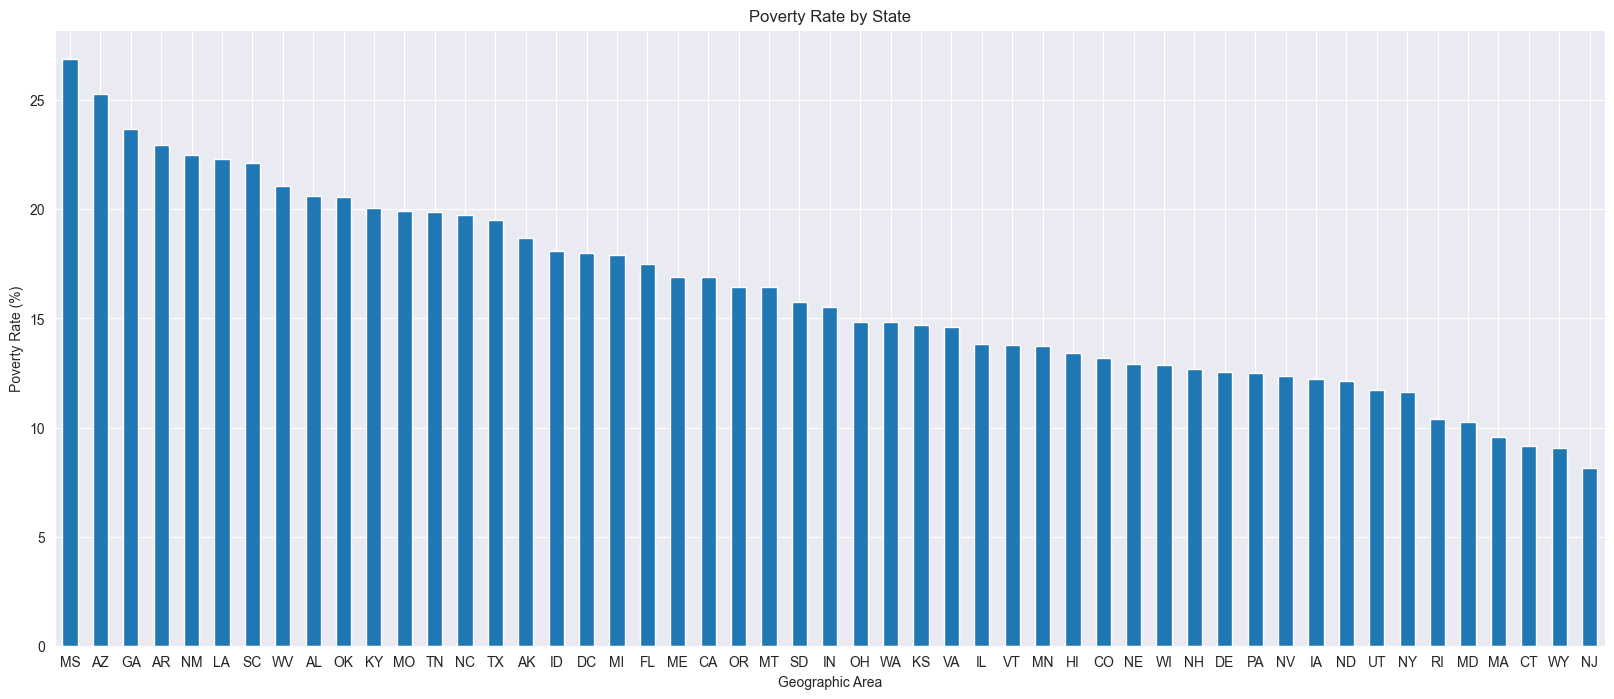

In [162]:
pct_poverty_by_state.plot(
    kind='bar',
    figsize=(20,8),
    title = 'Poverty Rate by State',
    rot=0
)

plt.ylabel('Poverty Rate (%)')
plt.show()

Mississippi has the highest poverty rate and New Jersey has the lowest

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [163]:
pct_hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()
pct_hs_by_state.head()

Geographic Area
TX   74.09
MS   78.47
GA   78.63
NM   78.97
LA   79.12
Name: percent_completed_hs, dtype: float64

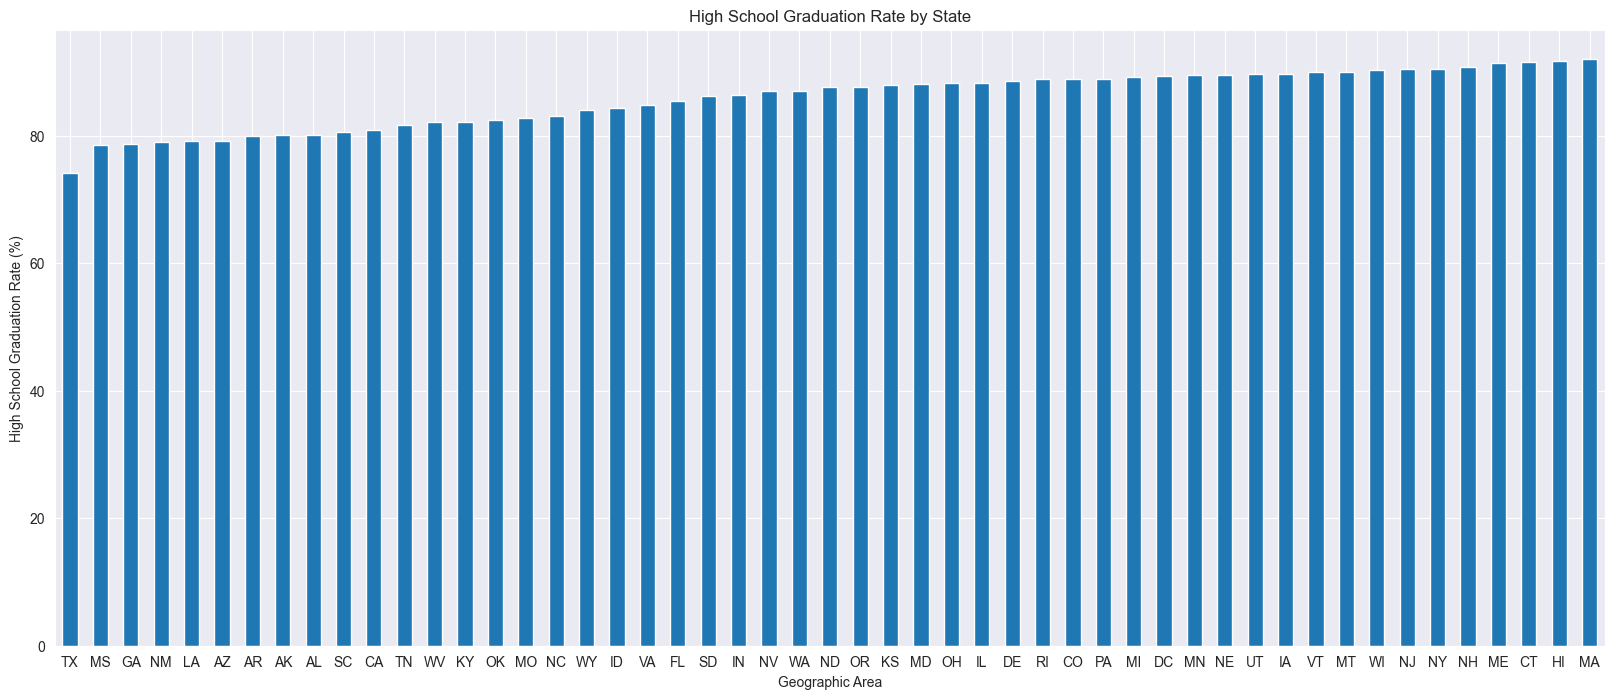

In [164]:
pct_hs_by_state.plot(
    kind='bar',
    figsize=(20,8),
    title = 'High School Graduation Rate by State',
    rot=0
)

plt.ylabel('High School Graduation Rate (%)')
plt.show()

With lowest high school graduation rate is Texas and highest is Massachusetts

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [165]:
pct_hs_by_state.sort_index(inplace=True)
pct_poverty_by_state.sort_index(inplace=True)
pct_hs_by_state.index==pct_poverty_by_state.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

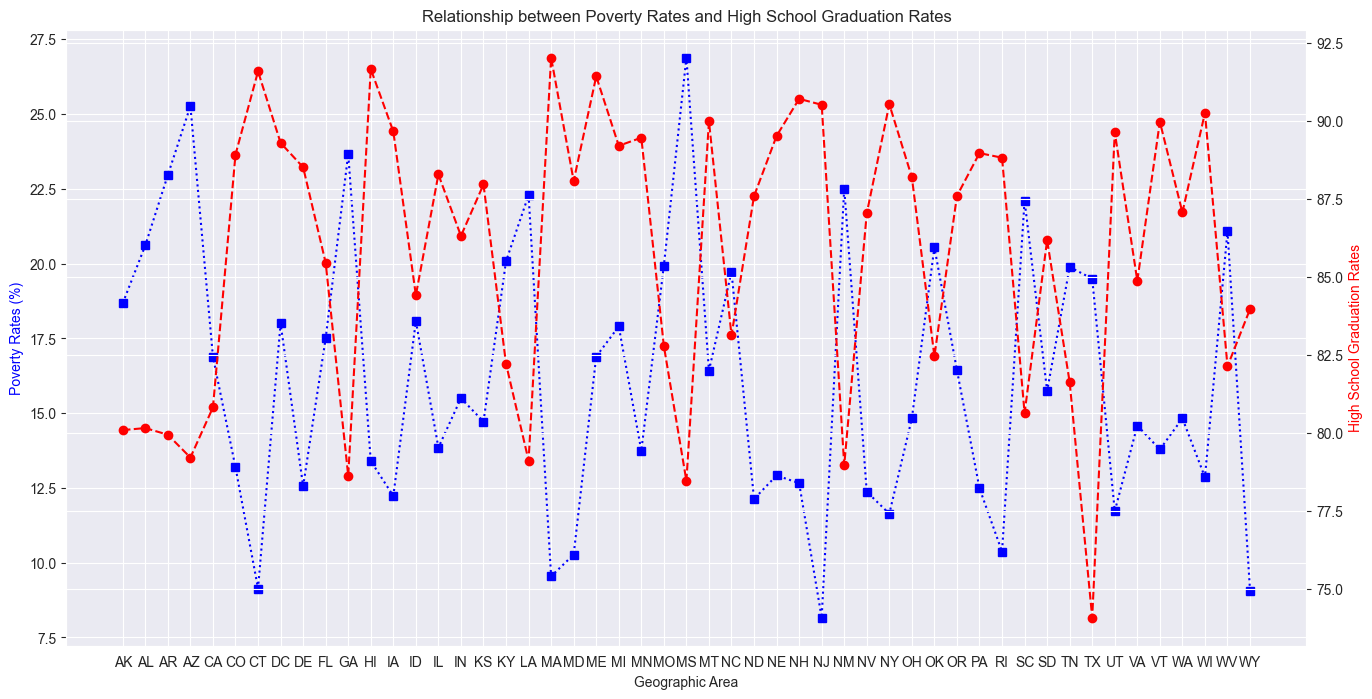

In [166]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Relationship between Poverty Rates and High School Graduation Rates')

poverty_axis = plt.gca()
hs_grad_axis = poverty_axis.twinx()

poverty_axis.set_xlabel('Geographic Area')
poverty_axis.set_ylabel('Poverty Rates (%)', color='blue')
hs_grad_axis.set_ylabel('High School Graduation Rates', color='red')

poverty_axis.plot(pct_poverty_by_state.index, pct_poverty_by_state, color='blue', linestyle='dotted', marker='s')
hs_grad_axis.plot(pct_hs_by_state.index, pct_hs_by_state, color='red', linestyle='dashed', marker='o')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [167]:
poverty_hs_comparison = pd.concat([pct_hs_by_state, pct_poverty_by_state], axis=1)
poverty_hs_comparison

,percent_completed_hs,poverty_rate
Geographic Area,,
AK,80.10,18.68
AL,80.16,20.61
AR,79.95,22.96
AZ,79.22,25.27
CA,80.82,16.89
CO,88.93,13.19
CT,91.59,9.14
DC,89.30,18.00
DE,88.52,12.56


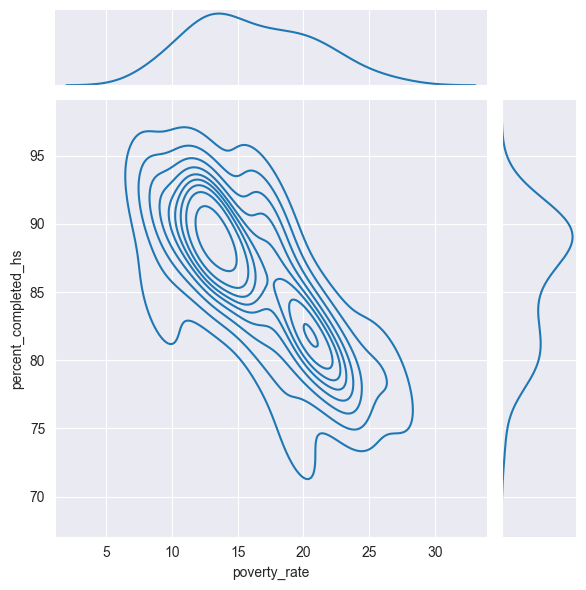

In [168]:
sns.jointplot(
    data = poverty_hs_comparison,
    y='percent_completed_hs',
    x='poverty_rate',
    kind='kde',
)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

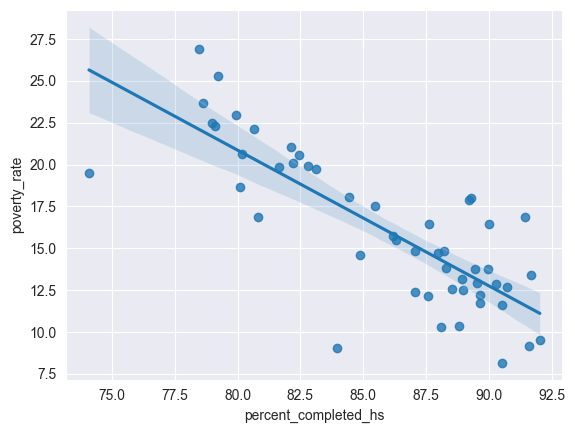

In [169]:
sns.regplot(
    data = poverty_hs_comparison,
    y='poverty_rate',
    x='percent_completed_hs',
)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [170]:
race_by_state = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_asian', 'share_hispanic', 'share_native_american']].mean()
race_by_state

,share_white,share_black,share_asian,share_hispanic,share_native_american
Geographic area,,,,,
AK,45.26,0.56,1.38,2.13,45.48
AL,72.51,23.32,0.48,2.98,0.66
AR,78.45,16.30,0.48,4.27,0.76
AZ,59.93,0.95,0.73,20.14,28.59
CA,71.54,2.68,5.54,29.51,1.72
CO,87.77,0.92,1.15,17.90,1.62
CT,86.11,4.99,2.99,7.98,0.66
DC,38.50,50.70,3.50,9.10,0.30
DE,76.25,15.39,2.00,7.42,0.52


In [171]:
# Normalize each column (since the average)
sum_per_state = race_by_state['share_asian'] + race_by_state['share_black'] + race_by_state['share_hispanic'] + race_by_state['share_native_american'] + race_by_state['share_white']
race_by_state['share_asian'] = race_by_state['share_asian'] / sum_per_state * 100
race_by_state['share_black'] = race_by_state['share_black'] / sum_per_state * 100
race_by_state['share_hispanic'] = race_by_state['share_hispanic'] / sum_per_state * 100
race_by_state['share_native_american'] = race_by_state['share_native_american'] / sum_per_state * 100
race_by_state['share_white'] = race_by_state['share_white'] / sum_per_state * 100

<Axes: title={'center': 'Share of Race by State'}, xlabel='Geographic area'>

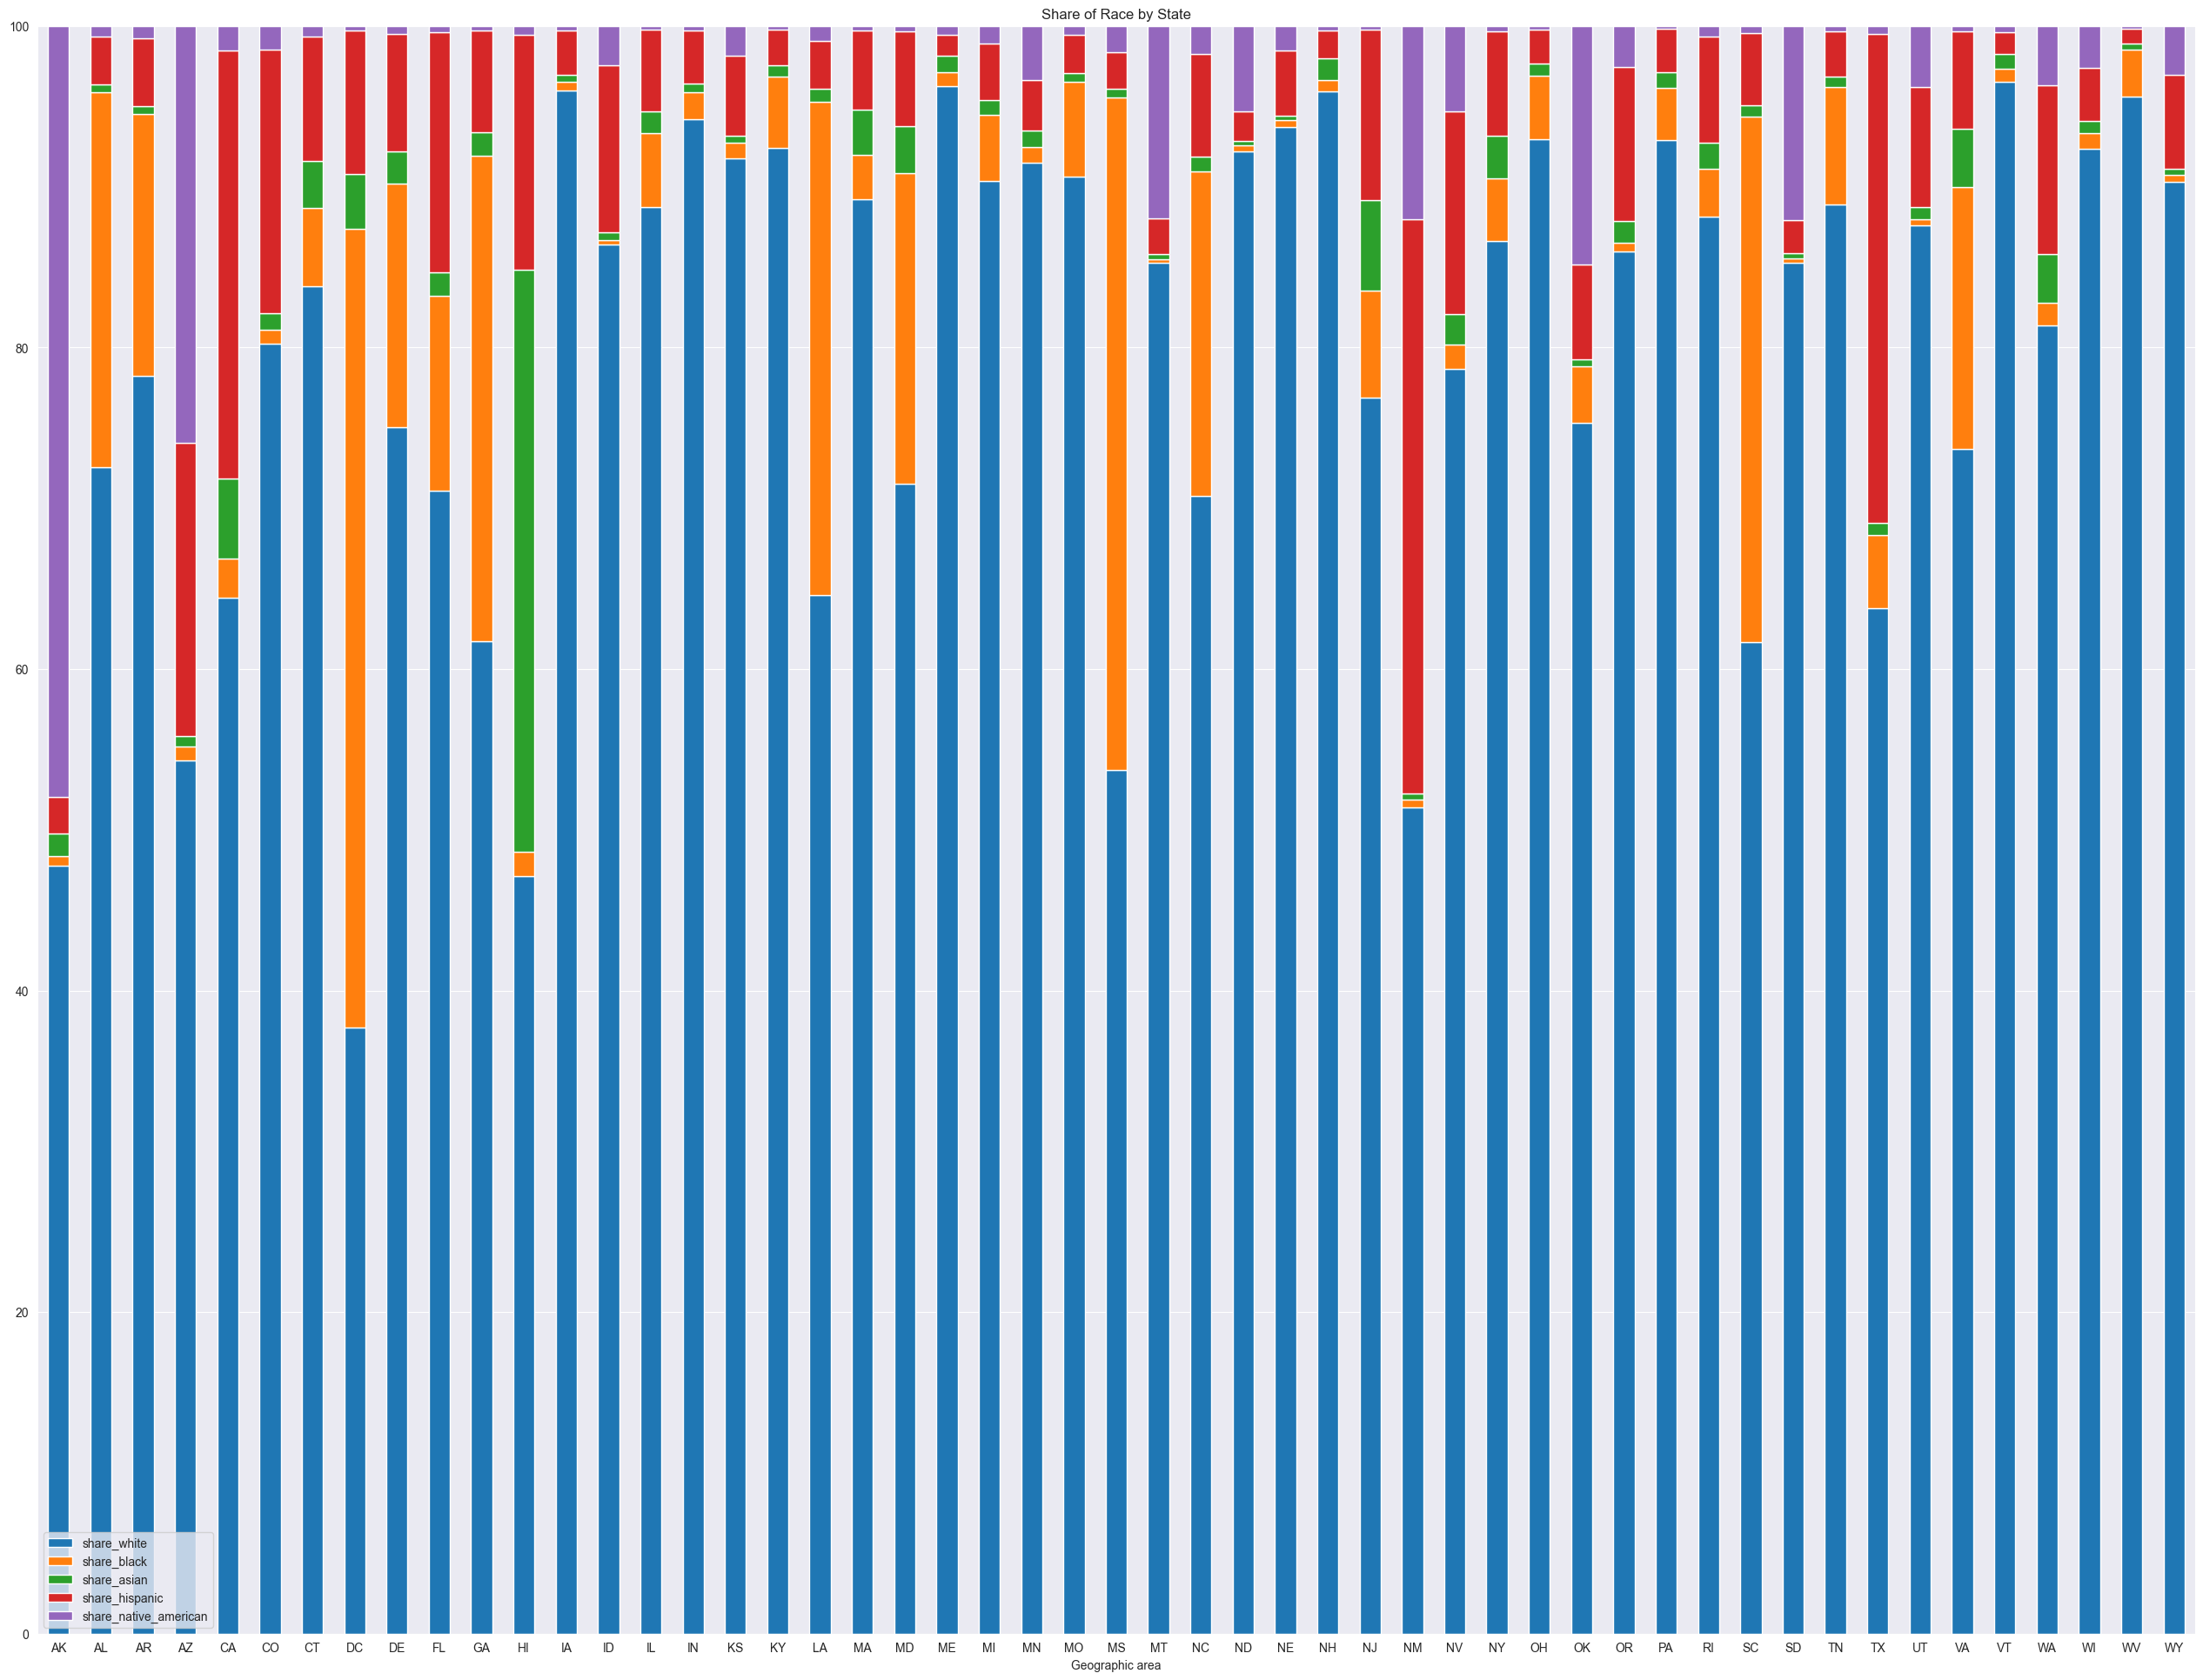

In [172]:
race_by_state.plot(
    kind='bar',
    figsize = (32,24),
    title = 'Share of Race by State',
    rot=0,
    stacked=True,
    ylim=(0,100),
)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [173]:
victims_by_race = df_fatalities['race'].value_counts().rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'})
victims_by_race

race
White              1168
Black               592
Hispanic            401
Asian                36
Native American      29
Others               28
Name: count, dtype: int64

In [174]:
px.pie(
    names = victims_by_race.index,
    values = victims_by_race,
    title = 'Victims by Race',
    hole = 0.4
)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [175]:
victims_by_sex = df_fatalities['gender'].value_counts().rename({'M':'Male','F':'Female'})
victims_by_sex

gender
Male      2160
Female      94
Name: count, dtype: int64

In [176]:
px.pie(
    values = victims_by_sex,
    names = victims_by_sex.index,
    title = 'Victims by Sex'
)

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [177]:
px.box(
    df_fatalities[df_fatalities['gender']=='M'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Male)'
)

In [178]:
px.box(
    df_fatalities[df_fatalities['gender']=='F'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Female)'
)


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [179]:
armed_status = df_fatalities['armed'].value_counts()
armed_status

armed
gun            1247
knife           324
unarmed         165
vehicle         158
toy weapon      102
               ... 
chain saw         1
garden tool       1
pole              1
pick-axe          1
pen               1
Name: count, Length: 67, dtype: int64

<Axes: title={'center': 'Top 10 Victims armed status'}, xlabel='armed'>

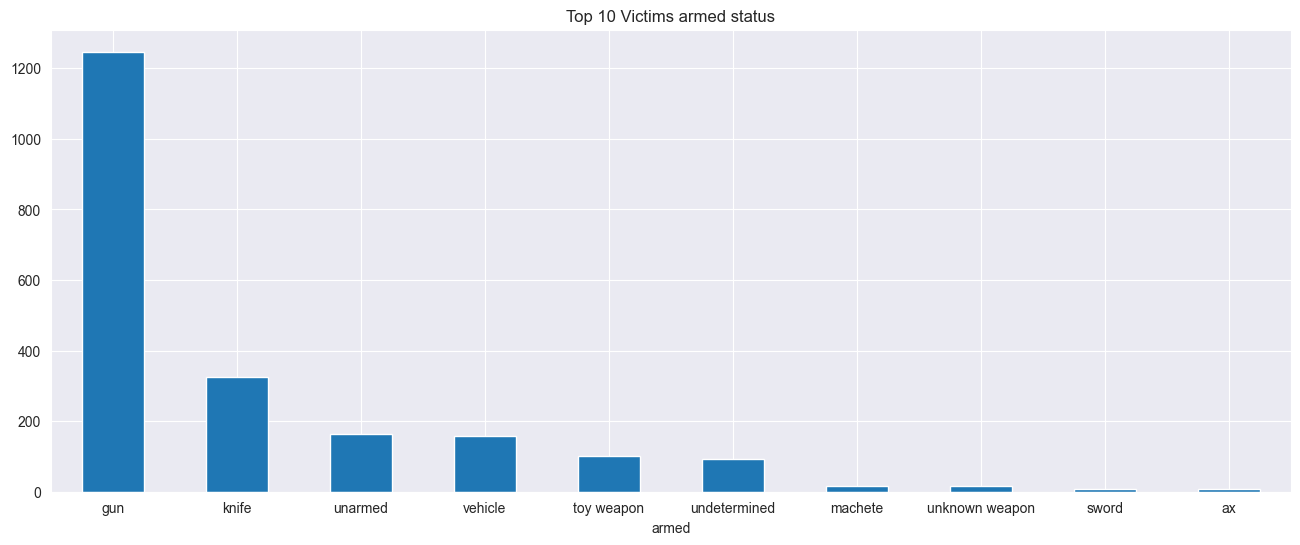

In [180]:
armed_status[:10].plot(
    kind='bar',
    figsize = (16,6),
    title = 'Top 10 Victims armed status',
    rot=0,
)

In [181]:
armed_vs_unarmed = pd.Series({
    'armed':len(df_fatalities[df_fatalities['armed']!='unarmed']),
    'unarmed':len(df_fatalities[df_fatalities['armed']=='unarmed'])
})
armed_vs_unarmed

armed      2089
unarmed     165
dtype: int64

In [182]:
px.pie(
    names = armed_vs_unarmed.index,
    values = armed_vs_unarmed.values,
    title = 'Armed vs Unarmed Percentage'
)

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [183]:
under_25 = len(df_fatalities[df_fatalities['age']<25])/len(df_fatalities)*100
print(f'{under_25:.2f}% of police killing victims are under the age of 25')

18.72% of police killing victims are under the age of 25


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

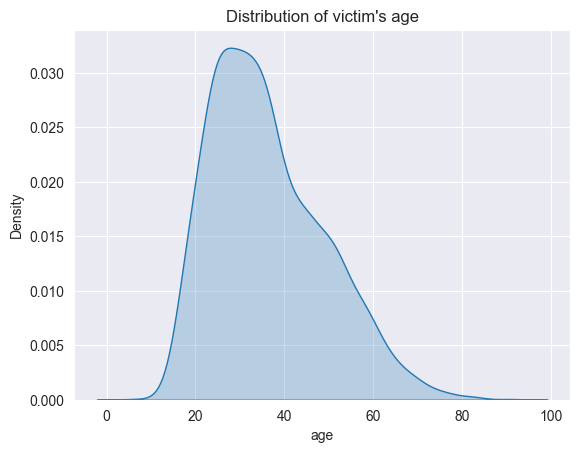

In [184]:
plt.title("Distribution of victim's age")
sns.kdeplot(data=df_fatalities, x='age', fill=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

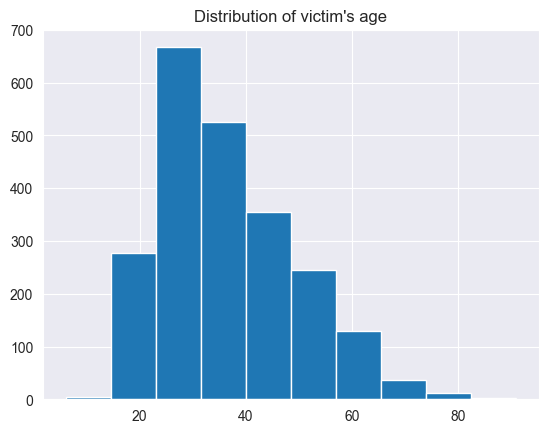

In [185]:
plt.title("Distribution of victim's age")
df_fatalities['age'].hist()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

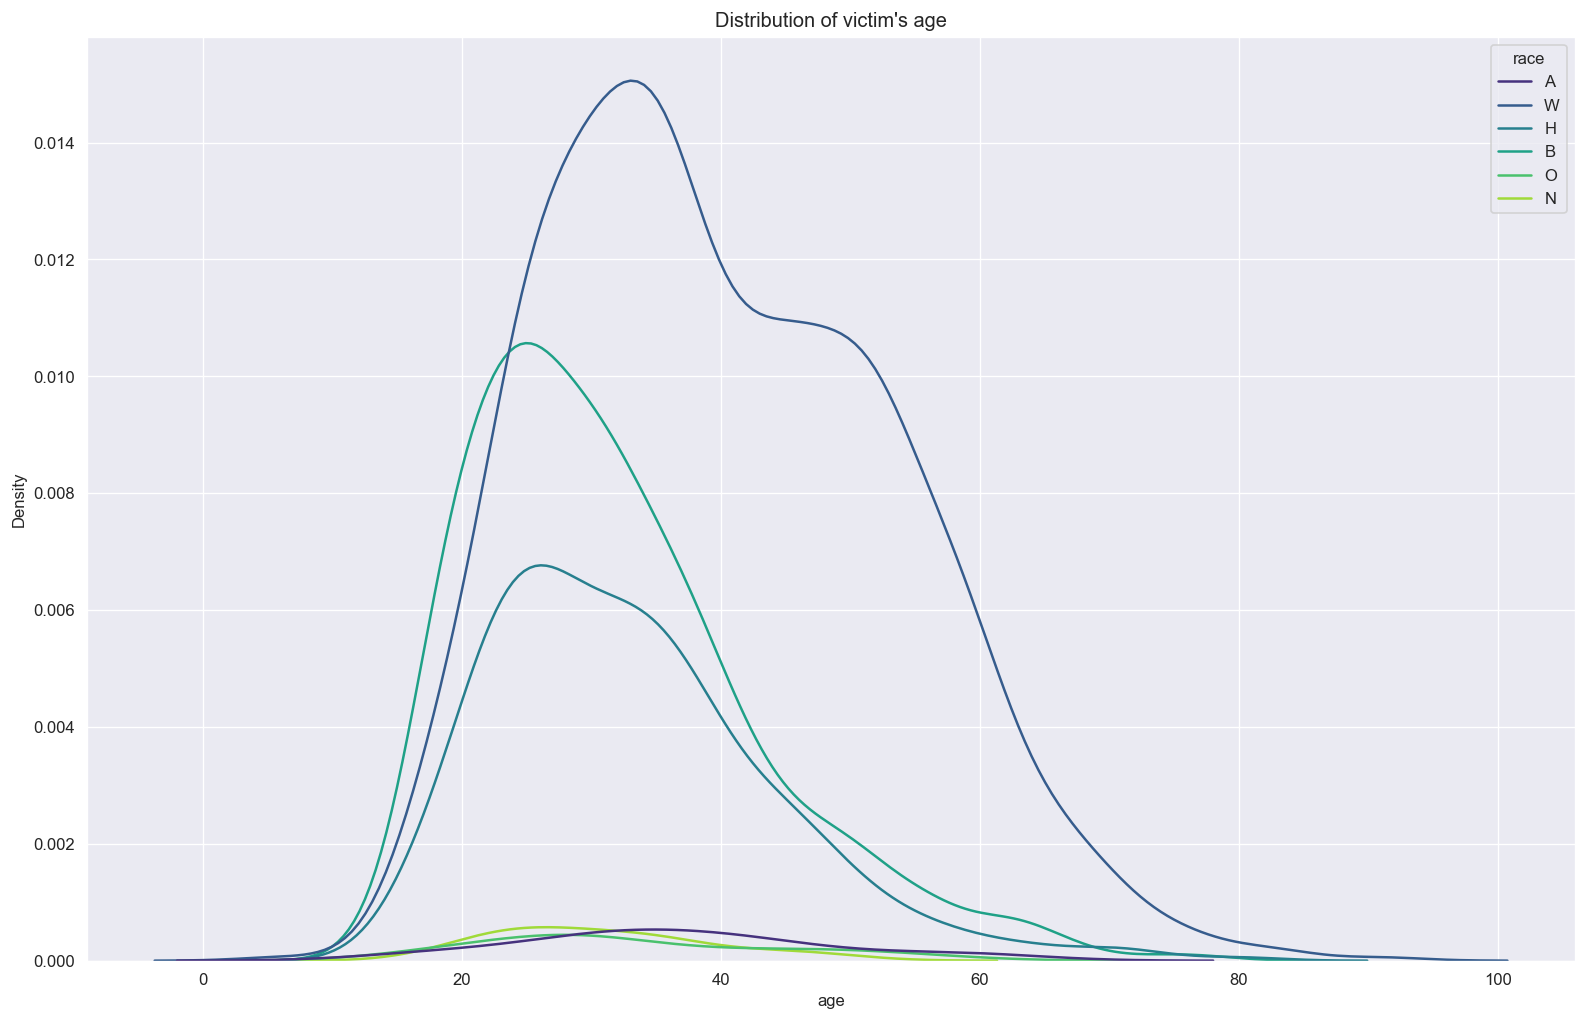

In [186]:
plt.figure(figsize=(16,10), dpi=120)
plt.title("Distribution of victim's age")
sns.kdeplot(
    data=df_fatalities.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'}),
    x='age',
    hue='race',
    palette='viridis'
)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [187]:
fatalities_by_mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()

In [188]:
px.pie(
    title = 'Relationship between Police Killing Victims and Mental Illness',
    names = fatalities_by_mental_illness.index,
    values = fatalities_by_mental_illness.values,
)

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [189]:
top_10_cities = df_fatalities['city'].value_counts().sort_values(ascending=False)[:10]
top_10_cities

city
Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
San Antonio     15
Miami           15
Indianapolis    14
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Cities with the most police killings'}, xlabel='city'>

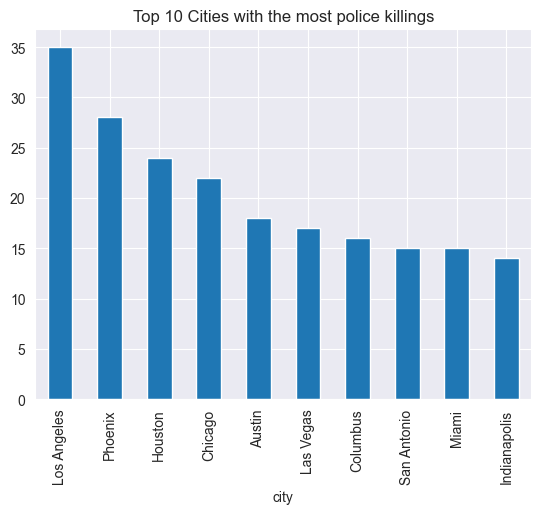

In [190]:
plt.title('Top 10 Cities with the most police killings')
top_10_cities.plot(kind='bar')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [191]:
top_10_cities_by_race = df_fatalities[df_fatalities['city'].isin(top_10_cities.index.tolist())].groupby(['city','race'])['name'].count().unstack(level=1)
top_10_cities_by_race.fillna(0, inplace=True)
top_10_cities_by_race.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'},axis=1, inplace=True)
top_10_cities_by_race

race,Asian,Black,Hispanic,Native American,Others,White
city,,,,,,
Austin,0.00,3.00,2.00,0.00,0.00,13.00
Chicago,0.00,19.00,1.00,0.00,0.00,2.00
Columbus,0.00,9.00,0.00,0.00,1.00,6.00
Houston,1.00,14.00,5.00,1.00,0.00,3.00
Indianapolis,0.00,9.00,0.00,0.00,0.00,5.00
Las Vegas,0.00,3.00,5.00,0.00,0.00,9.00
Los Angeles,1.00,10.00,18.00,0.00,0.00,6.00
Miami,0.00,7.00,6.00,0.00,0.00,2.00
Phoenix,0.00,2.00,11.00,3.00,0.00,12.00


<Axes: title={'center': 'Rate of Death by Race on Top 10 Cities'}, xlabel='city'>

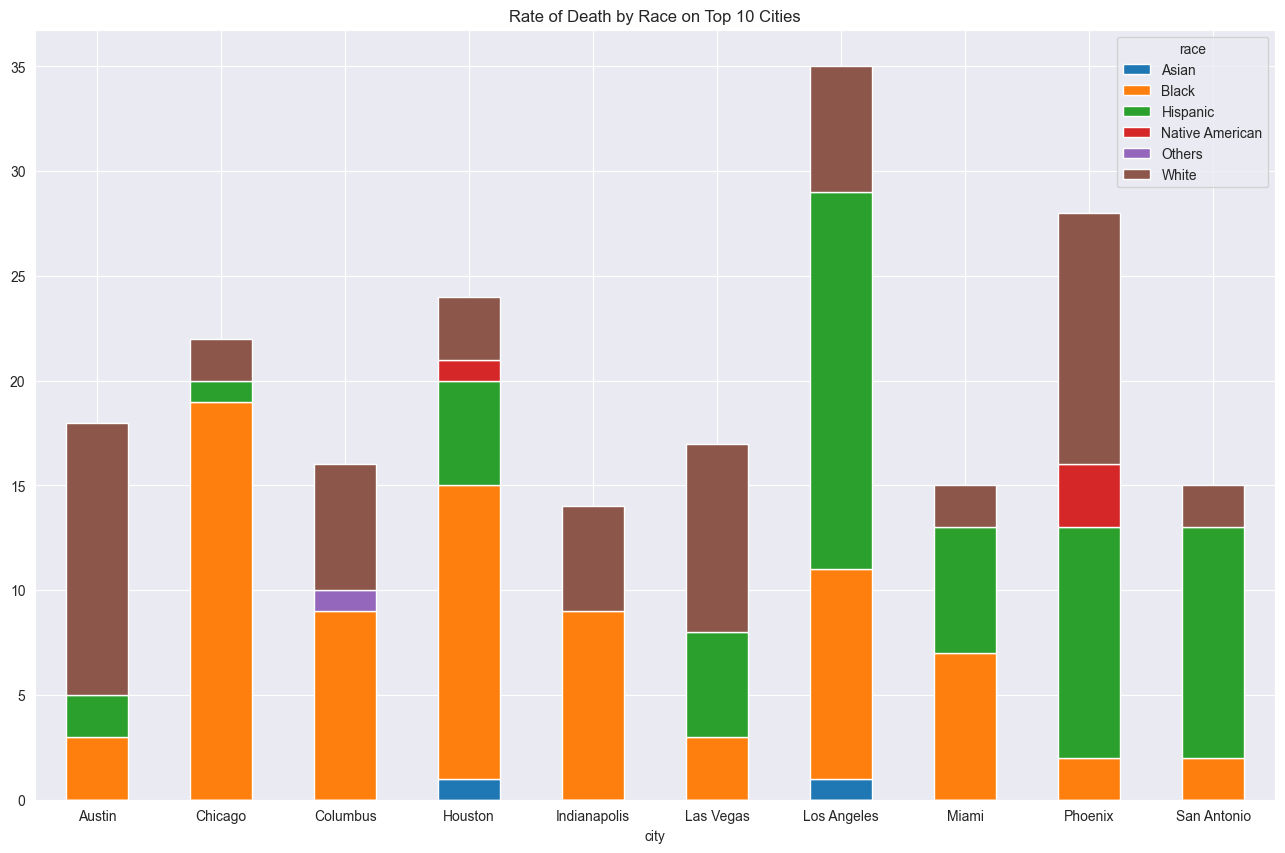

In [192]:
top_10_cities_by_race.plot(
    kind='bar',
    stacked=True,
    figsize=(16,10),
    title='Rate of Death by Race on Top 10 Cities',
    rot=0
)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [193]:
death_by_state = df_fatalities['state'].value_counts().sort_index()

In [194]:
px.choropleth(
    data_frame = death_by_state,
    locations = death_by_state.index,
    color = death_by_state.values,
    locationmode="USA-states",
    scope='usa',
    title = 'Police Killings b'
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [195]:
fatality_by_date = df_fatalities['date'].value_counts().sort_index()
fatality_by_date

date
2015-01-03    3
2015-01-04    2
2015-01-06    1
2015-01-07    2
2015-01-08    1
             ..
2017-12-02    2
2017-12-03    2
2017-12-04    1
2017-12-05    3
2017-12-06    4
Name: count, Length: 846, dtype: int64

<Axes: title={'center': 'Number of Police Killings over time'}, xlabel='date'>

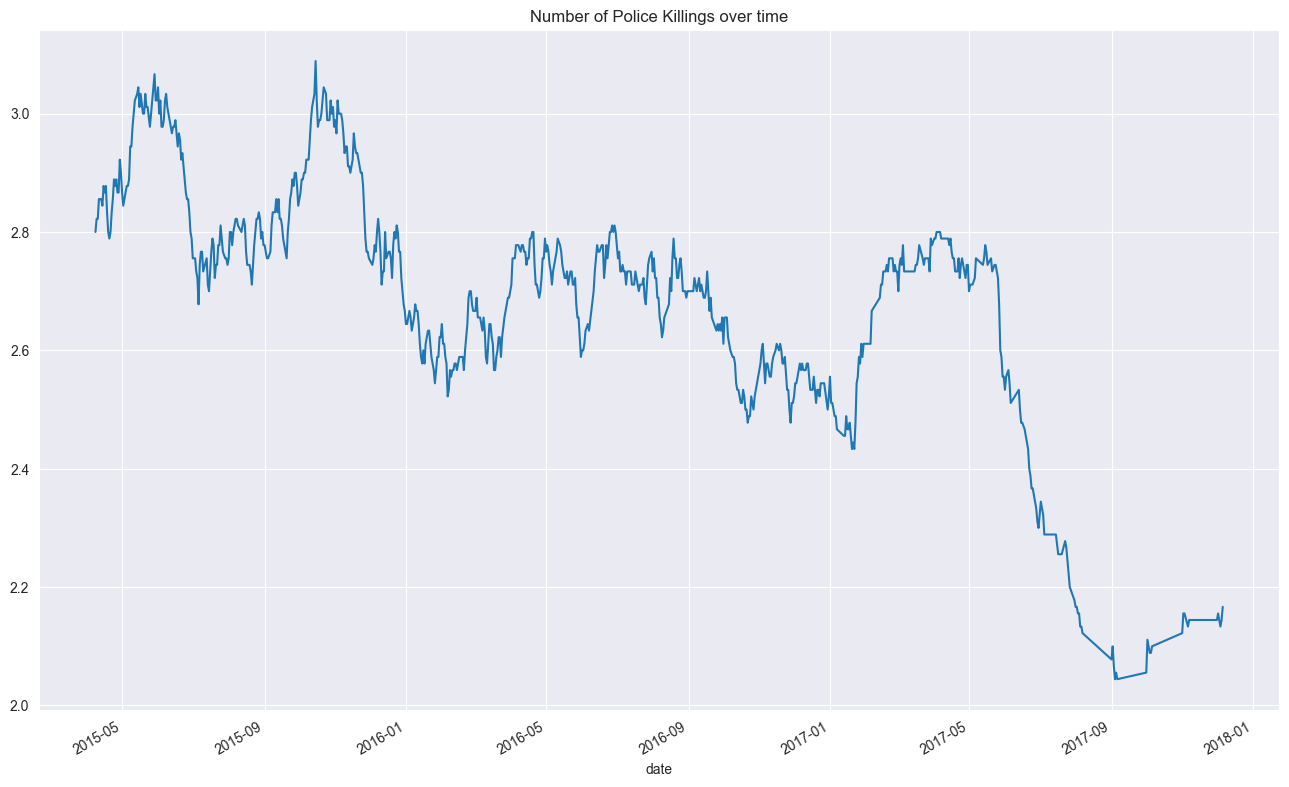

In [196]:
fatality_by_date.rolling(90).mean().plot(
    title='Number of Police Killings over time',
    figsize = (16,10)
)

In time police killing seems to have decreased

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

As a result of analysis, We can surely see that the majority of police killing victims in the dataset are white people. Also take another look at the top 10 cities with police killings, we can surely see that the majority is hispanic and black people victims.